In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
# only dist
data = """epoch,train_loss,val_psnr,val_ssim
1,0.239644,20.5409,0.8476
2,0.207911,19.6594,0.8422
3,0.202237,19.7363,0.8475
4,0.194124,19.7439,0.8579
5,0.187827,19.8487,0.8571
6,0.183049,19.4364,0.8553
7,0.177804,19.9253,0.8646
8,0.174425,20.3898,0.8730
9,0.172017,20.0572,0.8680
10,0.167617,21.4455,0.8849
11,0.165457,19.7075,0.8688
12,0.163185,20.4434,0.8796
13,0.160828,20.6687,0.8835
14,0.157946,22.5876,0.8999
15,0.156850,21.0254,0.8871
16,0.153851,20.9898,0.8903
17,0.152937,22.0366,0.8975
18,0.151507,20.8404,0.8920
19,0.149996,21.0682,0.8923
20,0.149040,20.8141,0.8877
21,0.148376,23.2243,0.9116
22,0.145927,22.0699,0.9024
23,0.144984,23.3162,0.9129
24,0.143901,23.1422,0.9065
25,0.142809,23.1961,0.9117
26,0.141965,23.3227,0.9135
27,0.141337,22.8381,0.9104
28,0.140561,22.5542,0.9112
29,0.139287,22.6295,0.8983
30,0.138782,22.5902,0.9068
31,0.138469,23.3373,0.9163
32,0.136865,24.1042,0.9160
33,0.136535,23.1823,0.9151
34,0.135021,23.9394,0.9191
35,0.134909,23.4121,0.9144
36,0.134232,23.5530,0.9191
37,0.133977,22.8764,0.9121
38,0.133475,23.4398,0.9189
39,0.132003,23.2009,0.9158
40,0.132168,24.0956,0.9227
41,0.131389,23.7946,0.9173
42,0.130990,23.6126,0.9221
43,0.131020,24.4863,0.9237
44,0.130355,23.3431,0.9165
45,0.129834,23.7867,0.9122
46,0.129220,23.3825,0.9177
47,0.128552,22.7354,0.9105
48,0.128124,24.4161,0.9236
49,0.128216,24.2124,0.9267
50,0.127281,23.5156,0.9183
51,0.126503,23.9337,0.9169
52,0.125955,24.8049,0.9283
53,0.126212,24.2780,0.9217
54,0.125662,24.2953,0.9251
55,0.124563,23.9616,0.9225
56,0.123951,23.5227,0.9210
57,0.124372,24.5401,0.9266
58,0.123412,23.4327,0.9186
59,0.124100,23.2999,0.9210
60,0.123789,24.6854,0.9276
61,0.122979,24.4090,0.9270
62,0.123108,24.2594,0.9266
63,0.122306,24.1959,0.9231
64,0.122309,24.4108,0.9251
65,0.121993,24.3103,0.9260
66,0.121618,24.6704,0.9289
67,0.121743,24.0250,0.9241
68,0.121425,23.9760,0.9220
69,0.120936,23.8075,0.9188
70,0.120482,24.5114,0.9254
71,0.120031,24.4915,0.9254
72,0.120082,24.5073,0.9281
73,0.120129,24.2636,0.9268
74,0.119570,24.5714,0.9298
75,0.119216,24.6473,0.9305
76,0.119219,24.4618,0.9277
77,0.118788,24.7714,0.9307
78,0.118904,24.1548,0.9255
79,0.118752,24.5120,0.9293
80,0.118197,23.8415,0.9234
81,0.117944,24.9027,0.9310
82,0.117260,24.4789,0.9286
83,0.117523,24.6333,0.9300
84,0.117670,24.3840,0.9263
85,0.117634,24.2097,0.9276
86,0.117345,23.9342,0.9229
87,0.117065,24.5398,0.9271
88,0.116748,24.3725,0.9276
89,0.116602,24.3507,0.9279
90,0.116799,24.0008,0.9255
91,0.116466,24.4636,0.9284
92,0.116605,24.5688,0.9295
93,0.116700,24.5256,0.9288
94,0.116035,24.4817,0.9291
95,0.116640,24.5929,0.9300
96,0.116114,24.4188,0.9286
97,0.116374,24.4328,0.9281
98,0.116262,24.4381,0.9293
99,0.116670,24.4073,0.9286
100,0.116501,24.5075,0.9288
101,0.116580,24.4286,0.9288
102,0.115938,24.4862,0.9293
103,0.115858,24.4756,0.9291
104,0.116050,24.4842,0.9293
105,0.115872,24.4692,0.9291
106,0.115755,24.4692,0.9291
107,0.116086,24.4678,0.9291
108,0.116128,24.4832,0.9292
109,0.116008,24.4828,0.9292
110,0.115777,24.4702,0.9292
111,0.116159,24.4247,0.9290
112,0.116155,24.5643,0.9300
113,0.116361,24.4120,0.9281
114,0.115818,24.5457,0.9287
115,0.115116,24.4478,0.9291
116,0.116360,24.5291,0.9293
117,0.115647,24.5321,0.9287
118,0.116398,24.5157,0.9289
119,0.116380,24.4197,0.9280
120,0.116013,24.4199,0.9285
121,0.116806,24.6295,0.9290
122,0.116433,24.4914,0.9285
123,0.116336,24.5257,0.9279
124,0.116398,24.4663,0.9286
125,0.116786,24.7481,0.9300
126,0.116454,24.5882,0.9299
127,0.117098,24.3888,0.9275
128,0.116984,24.5858,0.9285
129,0.116786,24.5992,0.9296
130,0.117019,24.6679,0.9310
131,0.117250,24.2130,0.9276
132,0.116956,24.3244,0.9276
133,0.116791,24.8164,0.9309
134,0.117009,24.6110,0.9318
135,0.117464,24.2835,0.9257
136,0.116669,24.3994,0.9289
137,0.117115,24.0247,0.9259
138,0.117137,24.6576,0.9312
139,0.116859,24.8883,0.9312
140,0.117355,24.1563,0.9276
141,0.116951,24.9367,0.9329
142,0.116689,24.5905,0.9313
143,0.116515,24.0875,0.9205
144,0.117300,24.5435,0.9307
145,0.117632,24.1561,0.9267
146,0.116969,24.5830,0.9310
147,0.117979,24.5260,0.9285
148,0.117038,24.6969,0.9311
149,0.117703,24.8534,0.9325
150,0.117479,24.6812,0.9296
151,0.118049,24.5330,0.9268
152,0.117750,24.8132,0.9286
153,0.118199,24.2373,0.9281
154,0.118054,25.0308,0.9348
155,0.117767,24.3542,0.9285
156,0.117723,24.5414,0.9277
157,0.117170,24.4923,0.9295
158,0.117539,23.6830,0.9178
159,0.117798,24.3126,0.9263
160,0.117412,24.5438,0.9324
161,0.118079,24.0405,0.9245
162,0.117487,24.1572,0.9257
163,0.117079,24.9174,0.9309
164,0.117304,24.7609,0.9324
165,0.117716,24.7893,0.9300
166,0.117110,25.3670,0.9336
167,0.118568,24.3447,0.9304
168,0.117834,25.1288,0.9346
169,0.117609,24.3270,0.9312
170,0.117704,24.8552,0.9314
171,0.117235,24.4003,0.9315
172,0.117312,24.5402,0.9292
173,0.117270,25.0799,0.9336
174,0.117073,24.7540,0.9326
175,0.116491,24.9432,0.9355
176,0.116633,23.4377,0.9172
177,0.117387,24.1685,0.9268
178,0.116969,24.6365,0.9308
179,0.117585,24.8693,0.9338
180,0.116675,25.1082,0.9348
181,0.116779,25.0837,0.9347
182,0.117088,24.7836,0.9307
183,0.116729,24.7058,0.9249
184,0.116454,24.6098,0.9327
185,0.116249,24.5955,0.9303
186,0.116134,25.4833,0.9341
187,0.116326,24.4738,0.9293
188,0.116384,24.6613,0.9301
189,0.116230,24.7384,0.9314
190,0.115632,24.6075,0.9350
191,0.115985,24.9422,0.9336
192,0.115751,24.2560,0.9208
193,0.115851,25.0617,0.9348
194,0.115480,24.8063,0.9347
195,0.115039,24.4257,0.9328
196,0.115677,25.1031,0.9331
197,0.115174,25.1332,0.9341
198,0.115565,24.4352,0.9279
199,0.115164,25.1966,0.9343
200,0.115125,25.1657,0.9306
201,0.114584,24.5112,0.9261
202,0.113618,24.2485,0.9337
203,0.114654,24.8769,0.9332
204,0.114020,24.8353,0.9333
205,0.114242,24.4519,0.9257
206,0.114392,24.8911,0.9343
207,0.113757,24.5694,0.9246
208,0.114072,24.9329,0.9340
209,0.113589,25.4980,0.9375
210,0.113488,25.5717,0.9382
211,0.113018,25.1184,0.9310
212,0.112421,25.2121,0.9342
213,0.113282,25.2229,0.9338
214,0.112691,25.4017,0.9374
215,0.112189,25.3867,0.9380
216,0.112550,24.6761,0.9337
217,0.112516,24.2823,0.9319
218,0.111902,24.7754,0.9308
219,0.112048,25.2662,0.9361
220,0.111667,24.7335,0.9337
221,0.111636,25.4186,0.9337
222,0.110810,25.7210,0.9390
223,0.110219,25.6933,0.9364
224,0.111006,25.2710,0.9370
225,0.110738,25.2595,0.9369
226,0.110146,24.9560,0.9356
227,0.110713,25.4068,0.9362
228,0.109976,25.3404,0.9349
229,0.110042,24.9314,0.9318
230,0.109821,24.9380,0.9315
231,0.109679,25.5000,0.9378
232,0.109878,25.7581,0.9398
233,0.108969,25.3840,0.9332
234,0.109126,24.9459,0.9319
235,0.109363,25.3710,0.9395
236,0.108585,25.0243,0.9352
237,0.108752,25.8402,0.9402
238,0.108634,25.5136,0.9354
239,0.107613,24.7305,0.9315
240,0.107635,25.6851,0.9393
241,0.107991,25.8791,0.9394
242,0.107816,25.7178,0.9400
243,0.106887,24.9106,0.9372
244,0.107583,25.1935,0.9360
245,0.107488,25.6908,0.9407
246,0.106786,25.3198,0.9371
247,0.106516,25.6187,0.9395
248,0.106586,25.7193,0.9398
249,0.106209,24.4296,0.9362
250,0.105768,24.7613,0.9367
251,0.106480,24.9431,0.9374
252,0.105734,26.1428,0.9424
253,0.106041,25.1824,0.9372
254,0.105288,25.5420,0.9391
255,0.105076,25.5341,0.9379
256,0.104917,25.8407,0.9409
257,0.105090,25.5852,0.9415
258,0.104435,25.3660,0.9394
259,0.104261,25.2956,0.9388
260,0.104625,25.7166,0.9394
261,0.104136,25.8136,0.9416
262,0.104068,25.5472,0.9389
263,0.103804,25.6660,0.9370
264,0.103205,25.5633,0.9411
265,0.103710,25.6646,0.9409
"""

df = pd.read_csv(StringIO(data))

# 只显示最后10个数据
last_n = 100
df_tail = df
# .tail(last_n)

plt.figure()
plt.plot(df_tail["epoch"], df_tail["val_psnr"])
plt.xlabel("Epoch")
plt.ylabel("Validation PSNR")
plt.title(f"Validation PSNR vs Epoch (Last {last_n} Epochs)")
plt.show()

plt.figure()
plt.plot(df_tail["epoch"], df_tail["val_ssim"])
plt.xlabel("Epoch")
plt.ylabel("Validation SSIM")
plt.title(f"Validation SSIM vs Epoch (Last {last_n} Epochs)")
plt.show()


In [1]:
data1 = """epoch,train_loss,val_psnr,val_ssim
1,0.388823,16.2026,0.7347
2,0.320937,16.8120,0.7452
3,0.304476,17.5310,0.7569
4,0.287535,17.9878,0.7739
5,0.279773,18.0979,0.7826
6,0.276661,18.0886,0.7788
7,0.274807,18.2127,0.7911
8,0.272509,18.2028,0.7881
9,0.270974,18.2407,0.7908
10,0.271181,18.2746,0.7928
11,0.269702,18.2476,0.7897
12,0.268729,18.2509,0.7882
13,0.268227,18.2905,0.7967
14,0.267221,18.2250,0.7864
15,0.266155,18.3402,0.7960
16,0.265862,18.2929,0.7877
17,0.264168,18.2657,0.7888
18,0.263503,18.3285,0.7943
19,0.264572,18.3056,0.7887
20,0.264416,18.2885,0.7851
21,0.263268,18.3096,0.7903
22,0.262229,18.3169,0.7920
23,0.262365,18.2939,0.7863
24,0.262529,18.2865,0.7847
25,0.262732,18.3075,0.7833
26,0.262014,18.3510,0.7861
27,0.261566,18.3545,0.7875
28,0.261224,18.4062,0.7930
29,0.260740,18.3892,0.7917
30,0.260995,18.3542,0.7975
"""


data2 = """epoch,train_loss,val_psnr,val_ssim
1,0.388824,16.2024,0.7347
2,0.320934,16.8119,0.7452
3,0.304475,17.5312,0.7569
4,0.287532,17.9876,0.7739
5,0.279775,18.0956,0.7818
6,0.276637,18.0917,0.7793
7,0.274800,18.2132,0.7912
8,0.272517,18.2037,0.7878
9,0.270956,18.2393,0.7909
10,0.271160,18.2762,0.7928
11,0.269708,18.2462,0.7894
12,0.268672,18.2508,0.7882
13,0.268243,18.2909,0.7968
14,0.267188,18.2262,0.7865
15,0.266146,18.3339,0.7954
16,0.265890,18.2903,0.7874
17,0.264146,18.2617,0.7885
18,0.263506,18.3344,0.7952
19,0.264580,18.3055,0.7891
20,0.264378,18.2887,0.7851
21,0.263249,18.3115,0.7910
22,0.262213,18.3179,0.7923
23,0.262334,18.2975,0.7862
24,0.262526,18.2941,0.7854
25,0.262710,18.3080,0.7834
26,0.261994,18.3503,0.7862
27,0.261573,18.3481,0.7875
28,0.261216,18.4060,0.7927
29,0.260722,18.3839,0.7914
30,0.260999,18.3549,0.7974


"""

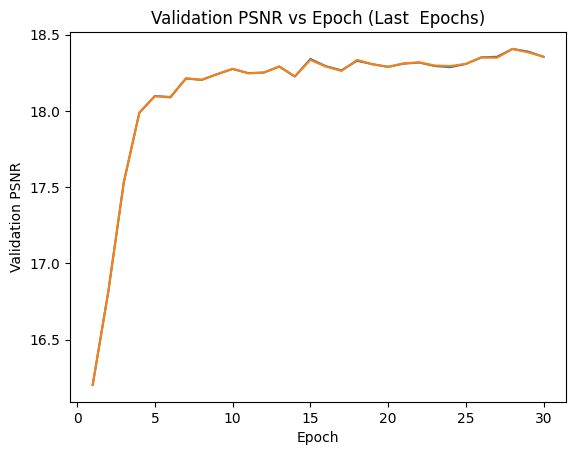

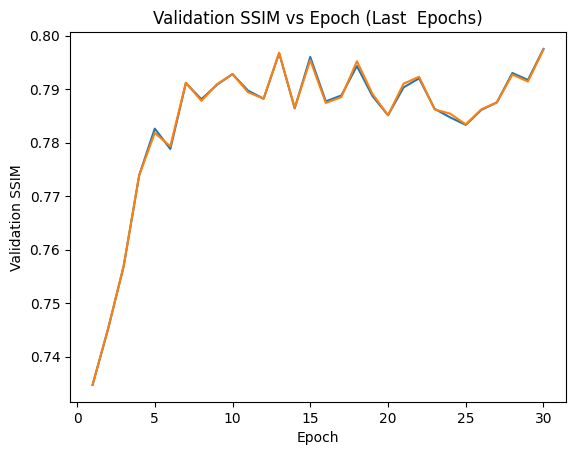

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO


df_dist = pd.read_csv(StringIO(data1))
df_phase = pd.read_csv(StringIO(data2))

plt.figure()
plt.plot(df_dist["epoch"], df_dist["val_psnr"])
plt.plot(df_phase["epoch"], df_phase["val_psnr"])
plt.xlabel("Epoch")
plt.ylabel("Validation PSNR")
plt.title(f"Validation PSNR vs Epoch (Last  Epochs)")
plt.show()

plt.figure()
plt.plot(df_dist["epoch"], df_dist["val_ssim"])
plt.plot(df_phase["epoch"], df_phase["val_ssim"])
plt.xlabel("Epoch")
plt.ylabel("Validation SSIM")
plt.title(f"Validation SSIM vs Epoch (Last  Epochs)")
plt.show()